In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


dataB = pd.read_csv('face_landmarks.csv')
data = dataB.drop(dataB.columns[[0, 1]], axis=1)


In [3]:
data.columns

Index(['landmark_0_y', 'landmark_0_z', 'landmark_1_x', 'landmark_1_y',
       'landmark_1_z', 'landmark_2_x', 'landmark_2_y', 'landmark_2_z',
       'landmark_3_x', 'landmark_3_y',
       ...
       'landmark_474_z', 'landmark_475_x', 'landmark_475_y', 'landmark_475_z',
       'landmark_476_x', 'landmark_476_y', 'landmark_476_z', 'landmark_477_x',
       'landmark_477_y', 'landmark_477_z'],
      dtype='object', length=1433)

In [4]:
normalized_data = (data - data.mean()) / data.std()

In [9]:

covariance_matrix = np.cov(normalized_data, rowvar=False)


eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
eigenvalues = np.where(eigenvalues < 1e-10, 0.0000000001, eigenvalues)

print(eigenvalues)

inertie = eigenvalues / np.sum(eigenvalues) * 100

print("Inertie:", sorted(np.round(inertie, 4).tolist(), reverse=True))



[1.00000000e-10 1.00000000e-10 1.00000000e-10 ... 1.56154078e+02
 4.80202718e+02 6.31362461e+02]
Inertie: [44.0588, 33.5103, 10.897, 4.9408, 4.3838, 1.1599, 0.4986, 0.2168, 0.1429, 0.0402, 0.0321, 0.0255, 0.0191, 0.0113, 0.009, 0.0079, 0.0068, 0.0064, 0.0045, 0.0035, 0.0031, 0.0025, 0.0021, 0.002, 0.0017, 0.0014, 0.0013, 0.0011, 0.001, 0.0009, 0.0008, 0.0007, 0.0006, 0.0006, 0.0005, 0.0005, 0.0004, 0.0004, 0.0003, 0.0003, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

C:\Users\chems\AppData\Local\Temp\ipykernel_8512\590360123.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', num_groups)
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


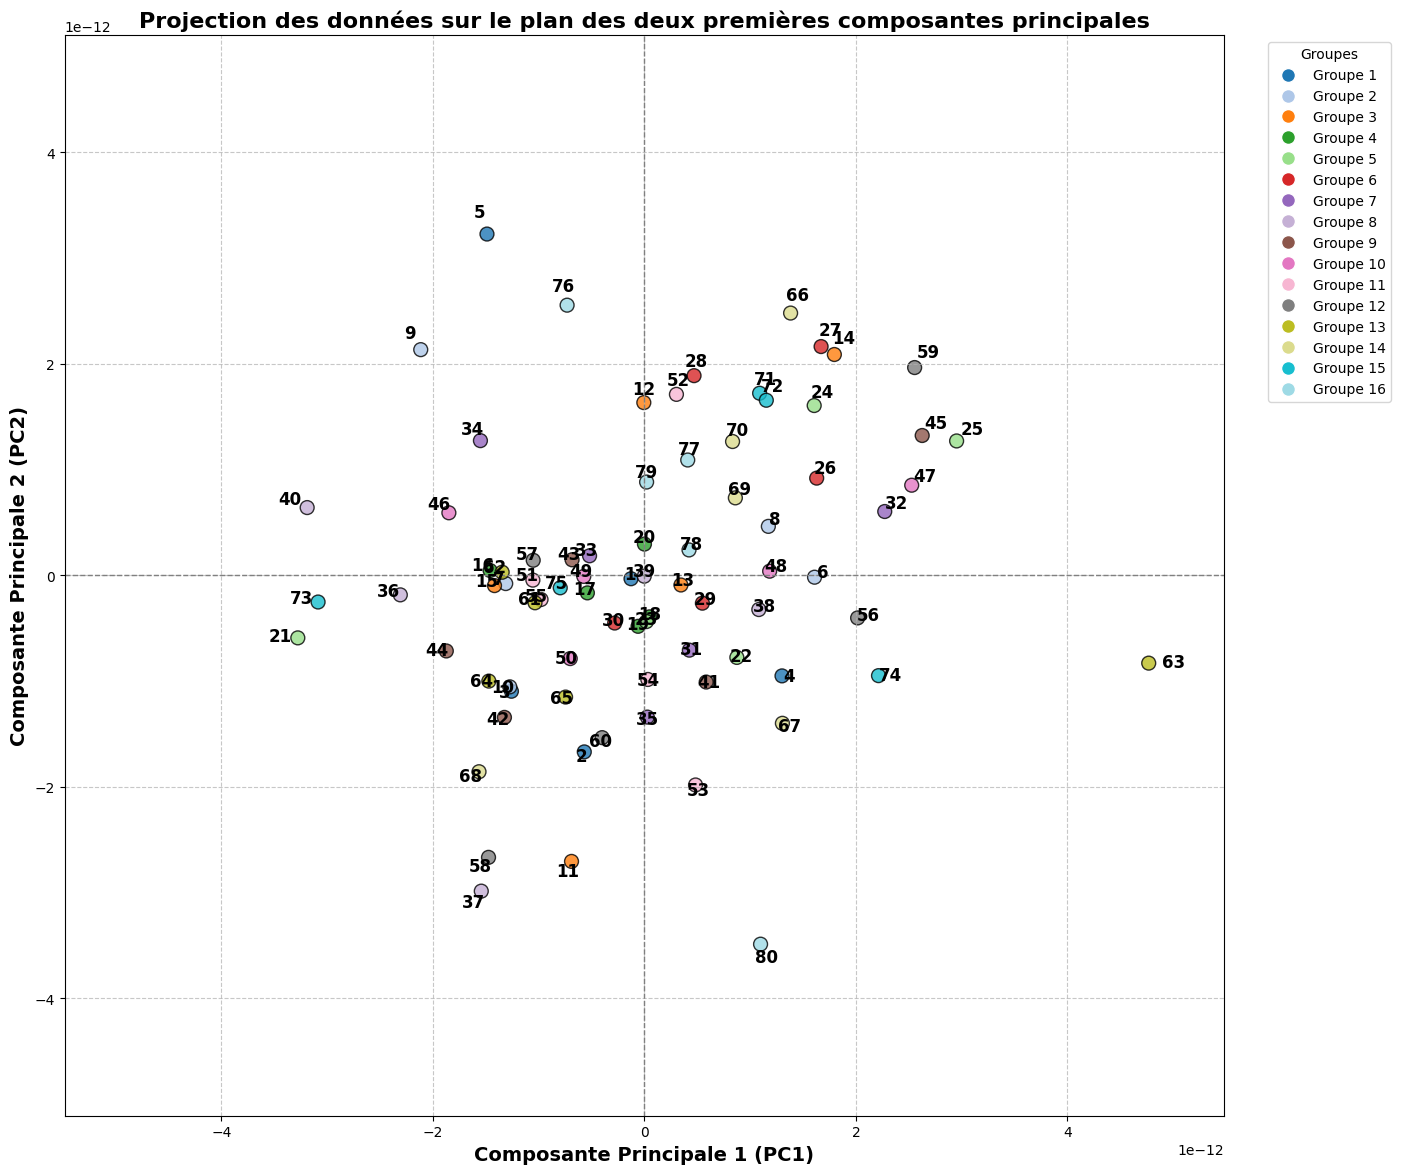

In [31]:
C = np.dot(normalized_data, eigenvectors)
plt.figure(figsize=(14, 12))

# Create a colormap for groups of 5 individuals
num_groups = C.shape[0] // 5 + (1 if C.shape[0] % 5 > 0 else 0)
colors = []
cmap = plt.cm.get_cmap('tab20', num_groups)
for i in range(C.shape[0]):
    group_index = i // 5
    colors.append(cmap(group_index))

# Plot each point with its corresponding color
scatter = plt.scatter(C[:, 0], C[:, 1], c=colors, alpha=0.8, s=100, edgecolors='k', linewidths=1)

# Add labels for each point
for i in range(C.shape[0]):
    plt.text(C[i, 0]*1.05, C[i, 1]*1.05, f"{i+1}", fontsize=12, ha='center', weight='bold')

# Enhance grid and labels
plt.xlabel("Composante Principale 1 (PC1)", fontsize=14, fontweight='bold')
plt.ylabel("Composante Principale 2 (PC2)", fontsize=14, fontweight='bold')
plt.title("Projection des données sur le plan des deux premières composantes principales", fontsize=16, fontweight='bold')

# Set equal aspect ratio to ensure proper scaling
plt.axis('equal')

# Increase the scale for better visualization
scale_factor = 6e-12  # Increased scale factor
plt.xlim(-scale_factor, scale_factor)
plt.ylim(-scale_factor, scale_factor)

# Add grid and reference lines
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.7)

# Add group legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i), 
                     markersize=10, label=f'Groupe {i+1}') for i in range(num_groups)]
plt.legend(handles=handles, title="Groupes", loc='upper right', bbox_to_anchor=(1.15, 1))

plt.tight_layout()
plt.show()

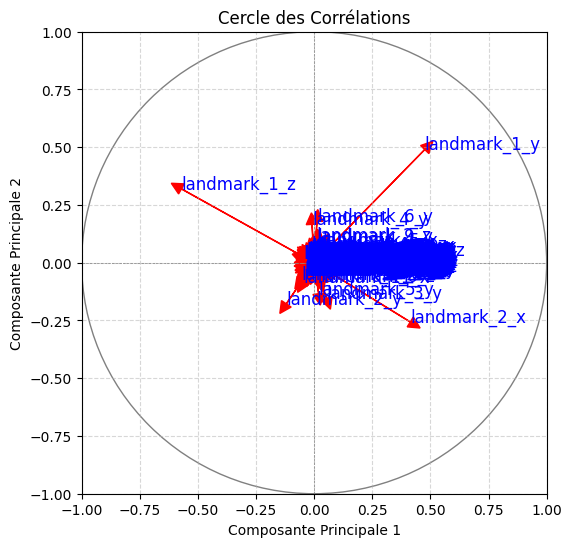

In [32]:
columns = data.columns[2:]

fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.axhline(0, color='gray', linestyle='--', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='--', linewidth=0.5)

pc1 = eigenvectors[:, 0]
pc2 = eigenvectors[:, 1]

for i in range(min(len(pc1), len(columns))):
    plt.arrow(0, 0, pc1[i], pc2[i], head_width=0.05, head_length=0.05, fc='r', ec='r')
    plt.text(pc1[i], pc2[i], columns[i], fontsize=12, color='blue')

cercle = plt.Circle((0, 0), 1, color='gray', fill=False)
ax.add_artist(cercle)

plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.title("Cercle des Corrélations")
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

In [12]:
projections_1_2 = C[:, :2]
contributions = (projections_1_2 ** 2) * 1/20 / eigenvalues[:2]
contributions *= 100

In [13]:
individus = data.index.tolist()

df_contributions = pd.DataFrame(contributions, columns=['Axe 1', 'Axe 2'], index=individus)

In [14]:
moyenne=np.mean(df_contributions,axis=0)

In [15]:
cercle_corr = eigenvectors[:, :2] * np.sqrt(eigenvalues[:2])

In [16]:
df_cercle_corr = pd.DataFrame(cercle_corr[:len(columns)], columns=['Axe 1', 'Axe 2'], index=columns)

In [17]:
contribution_var=df_cercle_corr **2 /eigenvalues[:2]
contribution_var *= 100 
moyenne_var=np.mean(contribution_var,axis=0)
print("moyenne variable \n",moyenne_var)

moyenne variable 
 Axe 1    0.069863
Axe 2    0.069773
dtype: float64


In [20]:
df_individu_corr = np.dot(normalized_data, eigenvectors[:, :2])


In [21]:
m = df_individu_corr.shape[0]

gamma_i = (1 / m) * ((df_individu_corr ** 2) / eigenvalues[:2])

contribution_ind = pd.DataFrame(gamma_i, columns=[f"Comp {i+1}" for i in range(gamma_i.shape[1])])

In [22]:
moyenne_ind=np.mean(contribution_ind,axis=0)

print("Moyenne des contributions γ_i par composante :\n", moyenne_ind)

Moyenne des contributions γ_i par composante :
 Comp 1    2.792069e-16
Comp 2    2.139369e-16
dtype: float64
